for this case, we will use tanh as the activation and see if anything changes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=200, noise=0.1)
df = pd.DataFrame({
    'X': X[:, 0],
    'Y': X[:, 1],
    'class': y.astype(float)
})
df.to_csv('ushape.csv', index=False)


In [3]:
df.head()

,X,Y,class
0,0.285651,-0.142390,1.0
1,0.936909,-0.080901,0.0
2,0.125753,0.181614,1.0
3,1.002670,0.273149,0.0
4,0.452070,1.060507,0.0


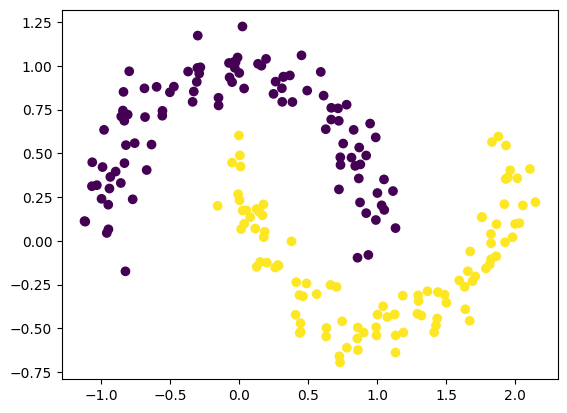

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
#for glorat weight initialization using tanh for hidden layer
model= Sequential()
model.add(Dense(10,activation='tanh',input_dim=2)) #hidden laye 1 and input layer
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid')) #output sigmoid->binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()
#these are the inital weights

[array([[-0.2761797 ,  0.0375945 , -0.21879408, -0.16915417,  0.15085185,
          0.46389633,  0.20459867,  0.65078825, -0.40003613,  0.4128812 ],
        [ 0.22746116,  0.04608554,  0.51720387, -0.3791323 , -0.25483197,
          0.64798576, -0.4037936 ,  0.6380879 , -0.21888545, -0.46758437]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4138597 ,  0.34926134, -0.28868452,  0.17222303, -0.33893722,
         -0.19958001,  0.47338307, -0.20488575,  0.22659391,  0.40860736],
        [ 0.01465124,  0.15200853,  0.09541279, -0.24418104, -0.21429849,
          0.4583727 , -0.47530687, -0.43881845, -0.333457  ,  0.1536023 ],
        [ 0.5020144 , -0.31219137,  0.50213385, -0.12234482,  0.4455592 ,
          0.05203247,  0.13257188, -0.0549041 , -0.11188465, -0.3273434 ],
        [-0.00778049,  0.34897363, -0.38036108,  0.19597238,  0.04744506,
          0.18660134, -0.44201913, -0.27538133,  0.0707233 ,  0.4181794 ],
        [-0.21249

In [10]:
initial_weights= model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)#bias for first hidden layer
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
print(initial_weights)

[array([[-0.01353513, -0.14304099,  0.01546387,  0.99242038,  0.69127558,
        -0.16635654, -0.36645709,  1.30944504, -0.55392603, -0.38216989],
       [-0.15868929, -0.83317639, -0.18185945, -0.11734835,  0.55931467,
         0.8271768 ,  0.56449763,  1.35663586, -1.22342495, -0.05365187]]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([[ 0.11433089, -0.51936826, -0.06126983,  0.19119193, -0.00127882,
         0.37042973, -0.06218023, -0.32809722, -0.05448546,  0.05536235],
       [-0.12571471,  0.30998721,  0.22343483, -0.09249138,  0.0587334 ,
         0.10457934, -0.27867521, -0.79881222,  0.03777205,  0.25844315],
       [-0.33567055,  0.07704782, -0.33518262,  0.25580678, -0.16656656,
         0.15615768, -0.25302913, -0.35952168, -0.64513769,  0.12645928],
       [ 0.25732728,  0.14256893,  0.44634373,  0.02436871,  0.3581909 ,
        -0.12767548, -0.12856265, -0.24110619, -0.27722739, -0.49608592],
       [ 0.16699195,  0.09276375,  0.10832404,  0.02352475, -0.176

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history= model.fit(X,y,epochs=100,validation_steps=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7931 - loss: 0.5338
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7814 - loss: 0.5049
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7785 - loss: 0.4724
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7888 - loss: 0.4584
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8607 - loss: 0.3807
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8511 - loss: 0.3817
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8260 - loss: 0.3917
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8494 - loss: 0.3550 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8542 - loss: 0.3470
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8513 - loss: 0.3424
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8581 - loss: 0.3215
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8728 - l

In [16]:
model.get_weights() # new weights after training

[array([[-1.6300055e-01, -2.1587765e-01,  5.3799752e-02,  8.9331031e-01,
          1.2615392e+00, -2.4748009e-01, -3.3602452e-01,  1.9093686e+00,
         -7.8372800e-01, -3.2715803e-01],
        [-1.8853918e-01, -8.0256706e-01, -1.8906489e-05, -1.6142239e-01,
          4.8947641e-01,  7.2816610e-01,  4.9920043e-01,  1.5260254e+00,
         -1.2869369e+00, -4.8280131e-02]], dtype=float32),
 array([ 0.05962963,  0.10334703,  0.0447441 ,  0.10799686, -0.26054847,
        -0.00712799,  0.00772949,  0.48491552,  0.05381506,  0.04700157],
       dtype=float32),
 array([[ 0.2905501 , -0.59376425, -0.04170489,  0.24508351, -0.05477806,
          0.42885894, -0.01095188, -0.40977204,  0.01848225, -0.01786926],
        [ 0.02208534,  0.26591718,  0.26109114, -0.07877542,  0.04061355,
          0.11372253, -0.28557023, -0.83308923,  0.08662947,  0.22200018],
        [-0.22471353,  0.12142747, -0.29446486,  0.22055073, -0.11911932,
          0.110484  , -0.3545013 , -0.33798406, -0.6478438 ,  0.1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


<Axes: >

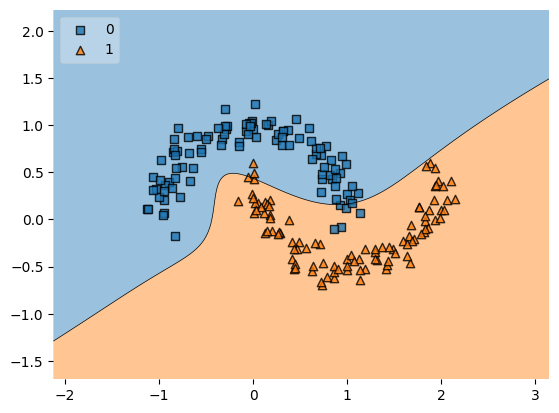

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)